# Modeling

Now that I have the data have been prepared with a minimum number of predictor variables that can represent the data very well, I can Train/Test different classification algorithms and measure the performance for each model.

In [1]:
# Import libraries necessary for this part of the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Allows the use of display() for DataFrames
from IPython.display import display 

# Import supplementary visualizations code visuals_2.py
import visuals_2 as vs2

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the Santander Customer Satisfacations data from a CSV file

data = pd.read_csv('Data/processed_dataset.csv')

In [3]:
data.head(5)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,Dimension 10,Dimension 11,Dimension 12,TARGET
0,-4.880790e+07,-1.090507e+07,-5.486603e+06,-3.378133e+06,305090.5665,-641634.4108,-535777.4725,-22051.9136,-23453.0686,-1.8078,-187289.5343,100374.4060,0
1,-4.880790e+07,-1.090507e+07,-5.486602e+06,-3.378133e+06,305090.6422,-641634.3768,-535777.5061,-22051.9036,-23453.1126,-1.7300,-187289.4573,100374.4646,0
2,-4.880790e+07,-1.090507e+07,-5.486602e+06,-3.378133e+06,305090.7846,-641634.3038,-535777.5623,-22051.8649,-23453.1858,-1.5902,-187289.3159,100374.5903,0
3,-4.880790e+07,-1.090507e+07,-5.486602e+06,-3.378133e+06,305090.7590,-641634.3164,-535777.5521,-22051.8730,-23453.1747,-1.6161,-187289.3418,100374.5661,0
4,-4.880790e+07,-1.090507e+07,-5.486598e+06,-3.378131e+06,305092.4727,-641635.2144,-535778.6937,-22057.0651,-23457.1630,-1.4047,-187289.1709,100369.7865,0


In [4]:
data.shape

(76020, 13)

### 1- Split Data

#### First : 
categoraing data to features and Target 

In [5]:
# Import train_test_split

from sklearn.model_selection import train_test_split

features = data[['Dimension 1','Dimension 2','Dimension 3', 'Dimension 4','Dimension 5',\
            'Dimension 6','Dimension 7', 'Dimension 8','Dimension 9', 'Dimension 10',\
            'Dimension 11','Dimension 12']]

satisfaction_status = data['TARGET']



#### Second : 

Splitting the data into train and test sets, where 80% of the data will be used for training and 20% data for testing.

In [6]:
# Split the 'calculated features' and 'TARGET' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    satisfaction_status, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 53214 samples.
Testing set has 22806 samples.


### 2- Modeling

In [10]:
# Method to plot the ROC curve
def ROC_Score (y_test , predictions_test):
    from sklearn.metrics import roc_curve
    
    print('ROC Curve')
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, predictions_test)

    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    
    # show the plot
    plt.show()

In [11]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Method to train & predict & evaluate the performance
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    
    results = {}
    
    # Fit the learner to the training data (X_train)
    start = time() # Get start time
    learner = learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test)
    # then get predictions on the train set(X_train)
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    # Compute accuracy on the training set
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the training set
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
        
    # Compute F-score on the test set 
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
    # calculate AUC
    results['AUC']=  roc_auc_score(y_test, predictions_test)
    
    #confusion matrix    
    confusion_df = pd.DataFrame(confusion_matrix(y_test, predictions_test),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
    
    #classification report
    classifying_report = classification_report(y_test, predictions_test)

    
    # Success
    print("{} has trained.".format(learner.__class__.__name__))
    print('confusion_matrix')
    print(confusion_df)
    print('-------------------/n')
    print('classification_report')
    print(classifying_report)
    print('-------------------/n')
    print(results)
    print('-------------------/n')
    ROC_Score (y_test , predictions_test)
    print('----------------------------------------------------------------------------------/n')
    # Return the results
    return results


Train and Test the following supervised learning models:

1. Logistic Regression

2. Decision Tree

3. Random Forest

4. Naive Bayes

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier has trained.
confusion_matrix
         Predicted Class 0  Predicted Class 1
Class 0              21641                250
Class 1                898                 17
-------------------/n
classification_report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     21891
           1       0.06      0.02      0.03       915

   micro avg       0.95      0.95      0.95     22806
   macro avg       0.51      0.50      0.50     22806
weighted avg       0.92      0.95      0.94     22806

-------------------/n
{'train_time': 0.4871091842651367, 'pred_time': 0.1449580192565918, 'acc_train': 0.9706092381704062, 'acc_test': 0.9496623695518723, 'f_train': 0.627689429373246, 'f_test': 0.04286434694906707, 'AUC': 0.5035795083090514}
-------------------/n
ROC Curve


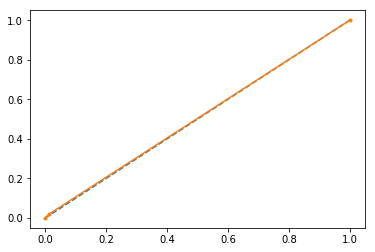

----------------------------------------------------------------------------------/n
GaussianNB has trained.
confusion_matrix
         Predicted Class 0  Predicted Class 1
Class 0                149              21742
Class 1                  4                911
-------------------/n
classification_report
              precision    recall  f1-score   support

           0       0.97      0.01      0.01     21891
           1       0.04      1.00      0.08       915

   micro avg       0.05      0.05      0.05     22806
   macro avg       0.51      0.50      0.05     22806
weighted avg       0.94      0.05      0.02     22806

-------------------/n
{'train_time': 0.023876190185546875, 'pred_time': 0.029876232147216797, 'acc_train': 0.046209644078625926, 'acc_test': 0.04647899675523985, 'f_train': 0.04889030486747845, 'f_test': 0.04976673549881456, 'AUC': 0.5012174327199366}
-------------------/n
ROC Curve


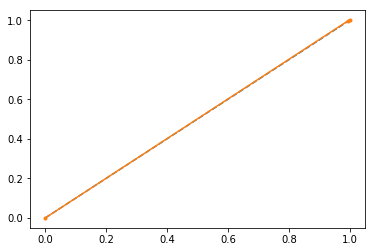

----------------------------------------------------------------------------------/n


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression has trained.
confusion_matrix
         Predicted Class 0  Predicted Class 1
Class 0              21847                 44
Class 1                914                  1
-------------------/n
classification_report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21891
           1       0.02      0.00      0.00       915

   micro avg       0.96      0.96      0.96     22806
   macro avg       0.49      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806

-------------------/n
{'train_time': 2.8731720447540283, 'pred_time': 0.0032830238342285156, 'acc_train': 0.9594843462246777, 'acc_test': 0.9579935104796983, 'f_train': 0.004235493434985175, 'f_test': 0.0045662100456621, 'AUC': 0.49954146887222906}
-------------------/n
ROC Curve


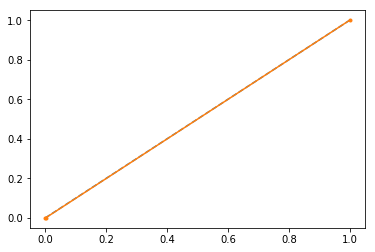

----------------------------------------------------------------------------------/n
DecisionTreeClassifier has trained.
confusion_matrix
         Predicted Class 0  Predicted Class 1
Class 0              21513                378
Class 1                896                 19
-------------------/n
classification_report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21891
           1       0.05      0.02      0.03       915

   micro avg       0.94      0.94      0.94     22806
   macro avg       0.50      0.50      0.50     22806
weighted avg       0.92      0.94      0.93     22806

-------------------/n
{'train_time': 0.27918481826782227, 'pred_time': 0.025918960571289062, 'acc_train': 0.974555568083587, 'acc_test': 0.9441375076734193, 'f_train': 0.7287060180734475, 'f_test': 0.0379544546544147, 'AUC': 0.5017488285851435}
-------------------/n
ROC Curve


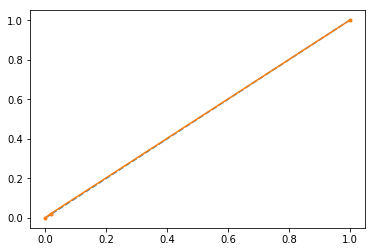

----------------------------------------------------------------------------------/n


In [12]:
# Import the four supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize the four models
clf_A = RandomForestClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = LogisticRegression(random_state=42)
clf_D = DecisionTreeClassifier()

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)



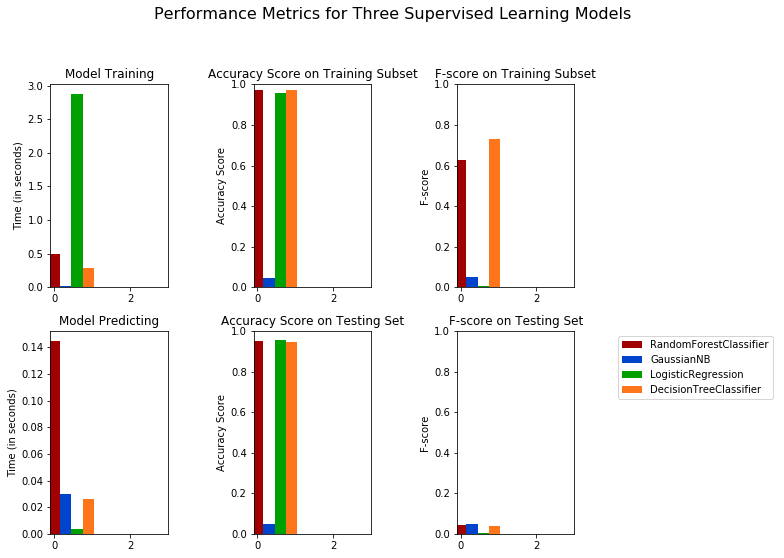

In [13]:
# Run metrics visualization for the three supervised learning models chosen
vs2.evaluate(results)

## Learning Curves


A learning curve graph for both training and testing per each model will produce; and the model is scored on both the training and testing sets using R2.

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. In the following plot you can see an example: naive Bayes roughly converges to a low score.

In [18]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
#from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split


def ModelLearning(features, satisfaction_status):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, features.shape[0]*0.75 - 1, 9)).astype(int)
    
    print(train_sizes)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    clf_RF = RandomForestClassifier(random_state=42)
    clf_DT = DecisionTreeClassifier()
    #clf_LR = LogisticRegression(random_state=42)
    clf_NB = GaussianNB()
    #clf_SVM = SVC()

    
    
    #clssfiers = [clf_RF] 
    #clssfiers = [clf_LR] 
    clssfiers = [clf_RF,clf_DT,clf_NB]  # clf_LR, ,clf_SVM

    k=0
    for c in clssfiers:
        k=k+1
        # Create a Decision tree regressor at max_depth = depth
        regressor = c

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, features, satisfaction_status, \
            cv = cv, train_sizes = train_sizes)  # , scoring = 'r2'

        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve
        ax = fig.add_subplot(3, 3, k)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('clssfier = %s'%(k))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, features.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Clssfiers Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

[    1  7128 14254 21381 28508 35634 42761 49887 57014]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:438: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, 

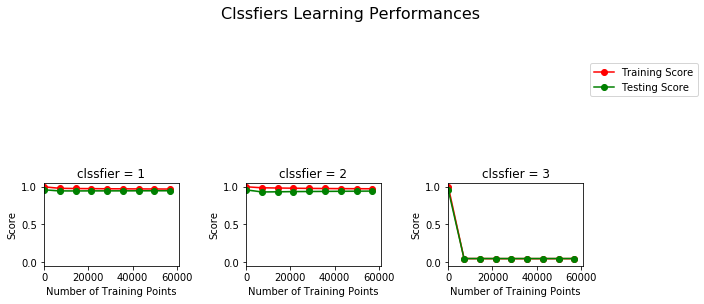

In [19]:
ModelLearning(features, satisfaction_status)